In [1]:
import os
import numpy as np
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import matplotlib.collections as mc
from itertools import combinations

DATA_PATH = "/home/kartik/layout-analysis/data/synthetic-data"
SAMPLE_SIZE = 10  # Adjust as needed (max 3000 points per file)

In [7]:
#HYPERPARAMETERS
NUM_NEIGHBOURS = 4

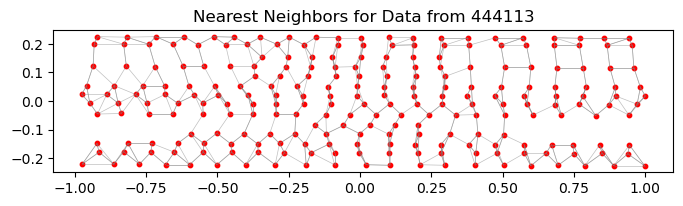

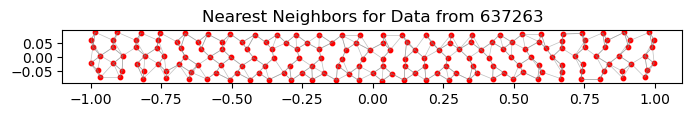

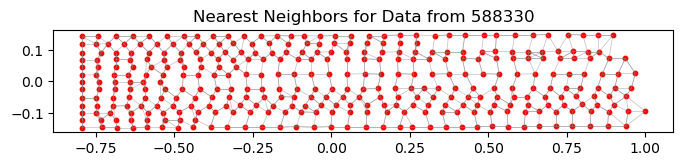

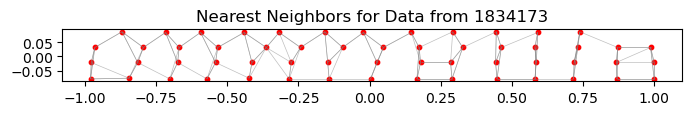

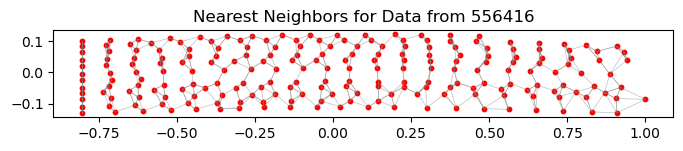

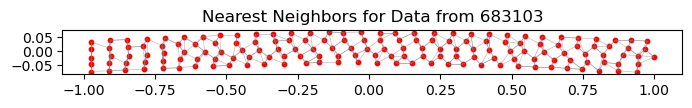

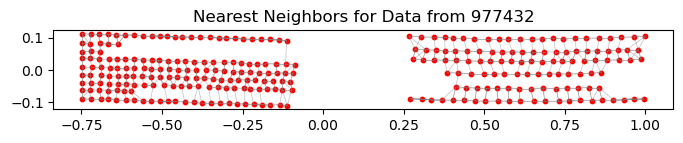

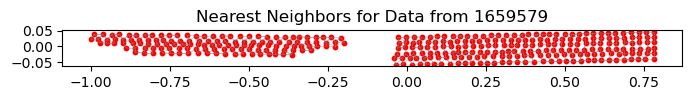

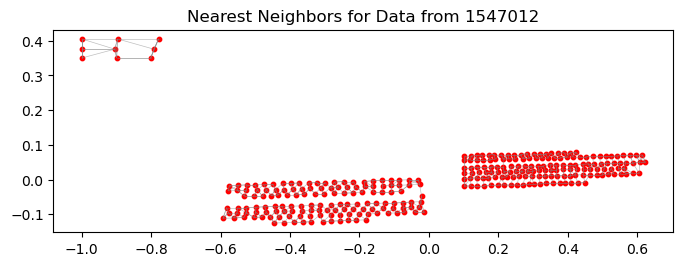

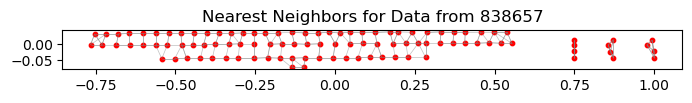

In [8]:
# Get unique prefixes efficiently without sorting everything
file_pairs = list(set(entry.name.split("__")[0] for entry in os.scandir(DATA_PATH)))[:SAMPLE_SIZE]

for prefix in file_pairs:
    points_file = os.path.join(DATA_PATH, f"{prefix}__points.txt")
    labels_file = os.path.join(DATA_PATH, f"{prefix}__labels.txt")
    
    points = np.loadtxt(points_file)  # Load points as a NumPy array
    labels = np.loadtxt(labels_file, dtype=int)  # Load labels as integers
    
    # Normalize and scale points around (0,0)
    centroid = np.mean(points, axis=0)
    points -= centroid
    scale = np.max(np.abs(points))
    if scale > 0:
        points /= scale

    # Compute 4 nearest neighbors using cKDTree
    # k=5 because the first neighbor is the point itself (distance 0)
    tree = cKDTree(points)
    distances, indices = tree.query(points, k=NUM_NEIGHBOURS)
    # Exclude self (first column)
    neighbors = indices[:, 1:]
    
    segments = []
    for i, nbrs in enumerate(neighbors):  # i is the current point index
        closest_neighbours = []  # To store tuples of (horizontalness, neighbor index)

        for j in nbrs:  # j is the neighbor index
            relative_vector = points[i] - points[j]
            closest_neighbours.append((j, relative_vector))
            segments.append((points[i],points[j]))

        # candidate_segments = []  # this will only have opposite line segment pairs
        # for cand1, cand2 in combinations(closest_neighbours, 2):
        #     relative_vector1 = cand1[1]
        #     relative_vector2 = cand2[1]
        #     if np.dot(relative_vector1, relative_vector2) < 0: # append if both are opposite
        #         candidate_segments.append((cand1,cand2))

        # # scoring candidates_segments based on horizontalness
        # _candidates_with_horizontalness = []
        # for cand1, cand2 in candidate_segments:
        #     relative_vector1 = cand1[1]
        #     relative_vector2 = cand2[1]
        #     norm1 = np.linalg.norm(relative_vector1)
        #     norm2 = np.linalg.norm(relative_vector2)

        #     horizontalness1 = np.abs(np.dot(relative_vector1, np.array([1, 0]))) / norm1
        #     horizontalness2 = np.abs(np.dot(relative_vector2, np.array([1, 0]))) / norm2

        #     cand1+=(horizontalness1,)
        #     cand2+=(horizontalness2,)

        #     _candidates_with_horizontalness.append((cand1,cand2))

        # score_candidate_pairs = []
        # for cand1, cand2 in _candidates_with_horizontalness:
        #     index1 = cand1[0]
        #     relative_vector1 = cand1[1]
        #     horizontalness1 = cand1[2]

        #     index2 = cand2[0]
        #     relative_vector2 = cand2[1]
        #     horizontalness2 = cand2[2]

        #     horizontalness = horizontalness1+horizontalness2
        #     if horizontalness>1.4:
        #         if np.abs(np.linalg.norm(relative_vector1)-np.linalg.norm(relative_vector2))<0.05:
        #             magnitude = np.linalg.norm(relative_vector1)+np.linalg.norm(relative_vector2)
        #             score = horizontalness/magnitude
        #             score_candidate_pairs.append((cand1, cand2, score))

        # # sort best pairs as per score
        # score_candidate_pairs.sort(key=lambda x: x[2], reverse=True)
        # top_candidate_pair = score_candidate_pairs[:1]

        # for cand1,cand2,score in top_candidate_pair:
        #     segments.append([points[i],points[cand1[0]]])
        #     segments.append([points[i],points[cand2[0]]])




        


    
    lc = mc.LineCollection(segments, colors='gray', linewidths=0.5, alpha=0.5)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.add_collection(lc)
    ax.scatter(points[:, 0], points[:, 1], c='red', s=10)
    ax.set_title(f"Nearest Neighbors for Data from {prefix}")
    ax.set_aspect('equal')
    plt.show()


In [ ]:

# page global awareness to adjust the thresholds...
# horizontalness: X AXIS np.array([1, 0])
# magnitude threshold - what is the median character spacing of the page


# 16 neighbours
# neighbors distances vs horizontalness
# opposite directions


# locals
# select 2 from 16 closest points (x,y)
# the 2 need to be opposite

# global
# horizontalness X AXIS np.array([1, 0])
# median character spacing

                                


SyntaxError: invalid syntax (2316297142.py, line 1)